In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dai = pd.read_csv('clean_joe_data_aug_4.csv')

# Select pertinent cols
dai = dai[['date','price']]

# format datetime
dai['date'] = pd.to_datetime(dai['date'], format = '%Y-%m-%d %H:%M:%S')

FileNotFoundError: [Errno 2] File b'clean_joe_data_aug_4.csv' does not exist: b'clean_joe_data_aug_4.csv'

In [28]:
# Get quartile cutoffs
first_quartile = dai['price'].quantile(.25)
second_quartile = dai['price'].quantile(.5)
third_quartile = dai['price'].quantile(.75)

# Subset df into different price tiers
Q1_dai_st_dev = dai[dai['price'] <= first_quartile]['price'].std()
Q2_dai_std_dev = dai[(dai['price'] > first_quartile) & (dai['price'] <= second_quartile)]['price'].std()
Q3_dai_std_dev = dai[(dai['price'] > second_quartile) & (dai['price'] <= third_quartile)]['price'].std()
Q4_dai_std_dev = dai[dai['price'] > third_quartile]['price'].std()

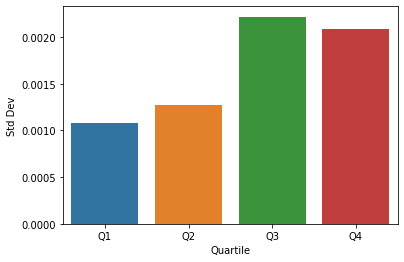

In [30]:
# Create df and plot different std devs
all_std_devs = pd.DataFrame({'Quartile': ['Q1','Q2','Q3','Q4'],
                             'Std Dev': [Q1_dai_st_dev, Q2_dai_std_dev, Q3_dai_std_dev, Q4_dai_std_dev]})

sns.barplot('Quartile', 'Std Dev', data = all_std_devs)

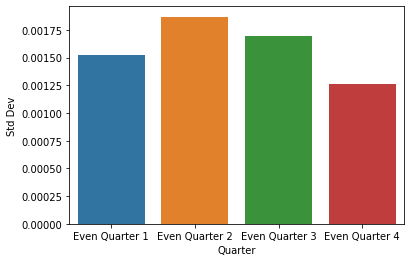

In [43]:
# Subset df into different price tiers
# Test even 25% splits
min_price = dai['price'].min()
max_price = dai['price'].max()
quarter_range = (max_price - min_price) * .25

Quarter1_dai_st_dev = dai[dai['price'] <= min_price + quarter_range]['price'].std()
Quarter2_dai_std_dev = dai[(dai['price'] > min_price + quarter_range) & (dai['price'] <= min_price + 2 * quarter_range)]['price'].std()
Quarter3_dai_std_dev = dai[(dai['price'] > min_price + 2 * quarter_range) & (dai['price'] <= min_price + 3 * quarter_range)]['price'].std()
Quarter4_dai_std_dev = dai[dai['price'] > min_price + 3 * quarter_range]['price'].std()

test = pd.DataFrame({'Quarter': ['Even Quarter 1','Even Quarter 2','Even Quarter 3','Even Quarter 4'],
                             'Std Dev': [Quarter1_dai_st_dev, Quarter2_dai_std_dev, Quarter3_dai_std_dev, Quarter4_dai_std_dev]})

sns.barplot('Quarter', 'Std Dev', data = test)

In [38]:
# Compare using quantiles as a cutoff vs even quarter splits
pd.DataFrame({'Quartile': [first_quartile, second_quartile, third_quartile],
              'Even_Quarters': [min_price + quarter_range, min_price + 2 *quarter_range, min_price + 3 * quarter_range]})

,Quartile,Quarter
0,0.014645,0.017065
1,0.019211,0.023844
2,0.026613,0.030622


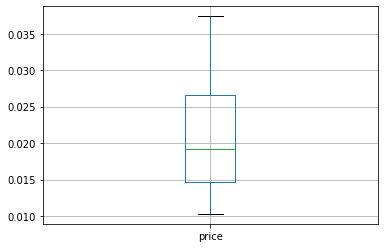

In [41]:
# price boxplot
dai.boxplot('price')